Plot distribution of CESM LE hist bias versus ERAI (WRF)
===

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

from netCDF4 import Dataset
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D
from matplotlib.text import Text

%load_ext autoreload
%autoreload 2
from model import Model
from GCNet import GCNet
from plotUtils import PlotUtils

pd.options.mode.chained_assignment = None
sns.set(color_codes = True)

Global data
----

In [2]:
onethird = 1./3.*100
# percs = [ 1, 5, 10, onethird, onethird*2, 90, 95, 99 ]
percs = [ 1, 5, 10, 90, 95, 99 ]

Load and prepare a data file
---

In [8]:
def loadData( mms ):
    # Load data, convert to 1-d
    modelDir = "/Volumes/sbp1/model/pwrf/gis_cesmle/historical/wrf/postproc/tas/ens"
    modelFN = "tas_wrf_cesmle_ens_1996-2005_"+mms+"_d_bias.nc"
    Mcl = Model("wrf_geog.nc", modelDir+"/"+modelFN)

    X = Mcl.loadData( "tas", True )
    X1d = X.values.reshape(-1,).tolist()
    return X1d

Calculate percentiles
---

In [4]:
def calcPercentiles( X, percs ):
    qn_x = np.percentile( X, percs )
#     print qn_x
    qn_y = np.ones( len(percs) ) * 0.45
    return [ qn_x, qn_y ]

Prepare & plot data
---

In [5]:
def plotData( X, mms, pctl ):
    # Make Kernel Density Estimate plot

    fig, ax1 = plt.subplots()

    # sns.distplot( X, hist=False, rug=False, cut=0)
    sns.kdeplot( X, cut=0, bw=0.2, linewidth=3, ax = ax1)
    plt.title('CESM LE Historical Bias vs ERAI', fontsize=16);
    plt.xlabel('Bias ($^\circ$C)');
    plt.ylabel('Kernel Density')
    
    # plot percentiles
    ax1.plot( pctl[0], pctl[1], 'ro' )
    plt.ylim( 0, .5 )

Process June
---

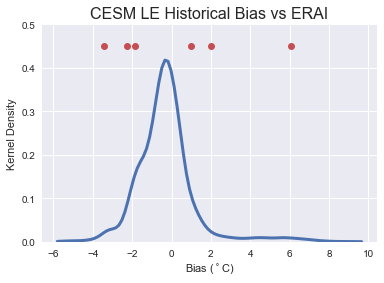

In [9]:
mms = "06"
X = loadData( mms )
pctls = calcPercentiles( X, percs )
plotData( X, mms, pctls )

Process July
---

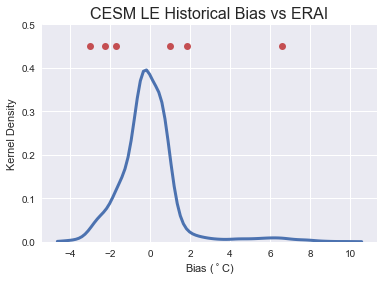

In [10]:
mms = "07"
X = loadData( mms )
pctls = calcPercentiles( X, percs )
plotData( X, mms, pctls )

Process August
---

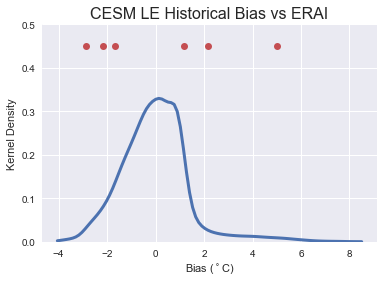

In [11]:
mms = "08"
X = loadData( mms )
pctls = calcPercentiles( X, percs )
plotData( X, mms, pctls )